In [11]:
# Import utilities
from face_utils import get_face_mask, visualize_face_mask
import cv2
import matplotlib.pyplot as plt
from inpaint_utils import inpaint_face
from pipeline import FacialAgingPipeline
from aging_prompts import get_premium_prompt, AgingPromptGenerator
from video_utils import process_video

I0000 00:00:1751003979.533821   57051 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1751003979.592004   57128 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 NVIDIA 570.133.07), renderer: NVIDIA GeForce RTX 5070 Ti/PCIe/SSE2
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1751003979.595111   57125 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
I0000 00:00:1751003979.597311   57051 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1751003979.624005   57149 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 NVIDIA 570.133.07), renderer: NVIDIA GeForce RTX 5070 Ti/PCIe/SSE2
W0000 00:00:1751003979.626772   57132 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1751003979.639900   57131 inference_feed

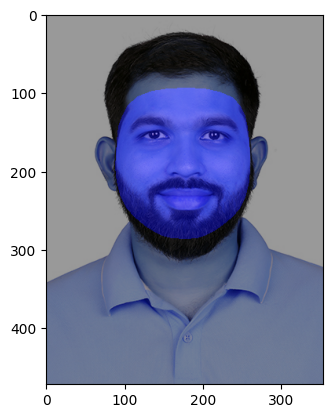

In [2]:
# Load image and extract mask
image = cv2.imread("photo.jpg")
mask = get_face_mask(image, mask_type="convex_hull")

# Visualize results
if mask is not None:
    visualization = visualize_face_mask(image, mask, alpha=0.4)
    plt.imshow(visualization)

In [3]:
aged_image = inpaint_face(image, mask)

Initializing Stable Diffusion pipeline on cuda with torch.float16
Loading model: runwayml/stable-diffusion-inpainting


Loading pipeline components...: 100%|██████████| 6/6 [00:00<00:00,  6.42it/s]


Enabled attention slicing
Pipeline loaded successfully
Starting inpainting with prompt: 'A realistic photo of the same person aged 10 years'
Image size: (354, 472), Steps: 50


100%|██████████| 50/50 [00:04<00:00, 11.55it/s]


Inpainting completed successfully


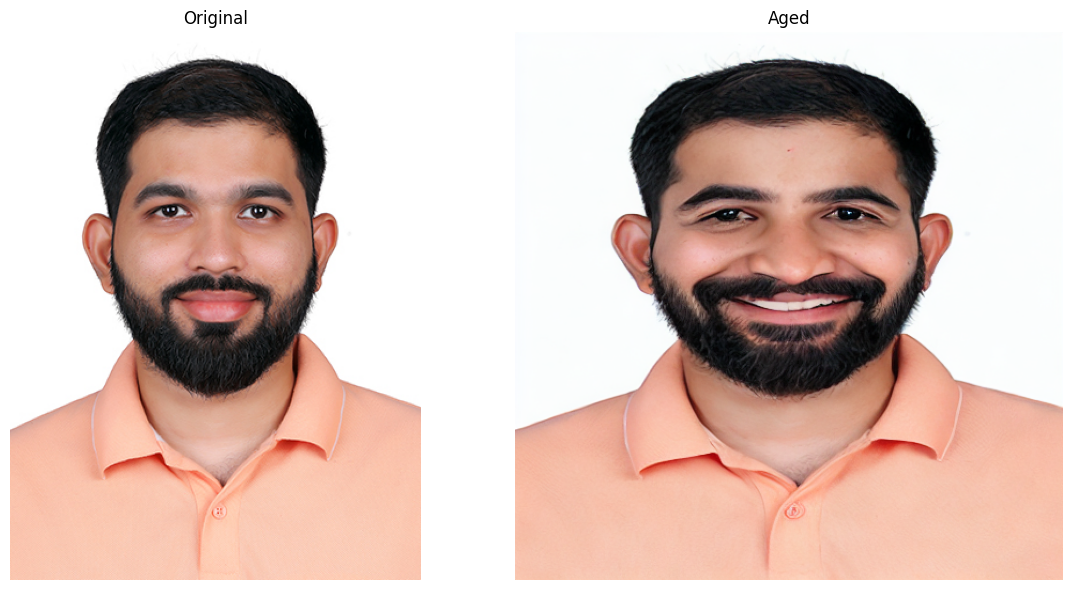

In [4]:
# Compare original vs aged
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Original image
original_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
axes[0].imshow(original_rgb)
axes[0].set_title("Original")
axes[0].axis('off')

# Aged image
aged_rgb = cv2.cvtColor(aged_image, cv2.COLOR_BGR2RGB)
axes[1].imshow(aged_rgb)
axes[1].set_title("Aged")
axes[1].axis('off')

plt.tight_layout()
plt.show()

In [7]:
pipeline = FacialAgingPipeline()
    
# Process age series
results = pipeline.process_age_series(
    image_path="photo.jpg", 
    age_increments=[5, 15, 30, 50, 80],
    num_inference_steps=30,  # Adjust for speed vs quality
    seed=42  # For reproducible results
)

Initialized Facial Aging Pipeline with model: runwayml/stable-diffusion-inpainting
Creating age series for: photo.jpg
  → Creating 5 age variants...
Initializing Stable Diffusion pipeline on cuda with torch.float16
Loading model: runwayml/stable-diffusion-inpainting


I0000 00:00:1751004201.676235   57051 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1751004201.719753   57283 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 NVIDIA 570.133.07), renderer: NVIDIA GeForce RTX 5070 Ti/PCIe/SSE2
W0000 00:00:1751004201.722367   57277 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
I0000 00:00:1751004201.724275   57051 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1751004201.758648   57304 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 NVIDIA 570.133.07), renderer: NVIDIA GeForce RTX 5070 Ti/PCIe/SSE2
W0000 00:00:1751004201.761427   57288 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1751004201.773206   57292 inference_feedback_manager.cc:114] Feedback manager requires a model w

Loading pipeline components...: 100%|██████████| 6/6 [00:00<00:00,  8.70it/s]


Enabled attention slicing
Pipeline loaded successfully
Processing image 1/5
Initializing Stable Diffusion pipeline on cuda with torch.float16
Loading model: runwayml/stable-diffusion-inpainting


Loading pipeline components...: 100%|██████████| 6/6 [00:00<00:00,  7.12it/s]


Enabled attention slicing
Pipeline loaded successfully
Starting inpainting with prompt: 'A realistic photo of the same person aged 5 years'
Image size: (354, 472), Steps: 30


100%|██████████| 30/30 [00:02<00:00, 14.29it/s]


Inpainting completed successfully
Processing image 2/5
Initializing Stable Diffusion pipeline on cuda with torch.float16
Loading model: runwayml/stable-diffusion-inpainting


Loading pipeline components...: 100%|██████████| 6/6 [00:00<00:00,  8.42it/s]


Enabled attention slicing
Pipeline loaded successfully
Starting inpainting with prompt: 'A realistic photo of the same person aged 15 years'
Image size: (354, 472), Steps: 30


100%|██████████| 30/30 [00:02<00:00, 14.27it/s]


Inpainting completed successfully
Processing image 3/5
Initializing Stable Diffusion pipeline on cuda with torch.float16
Loading model: runwayml/stable-diffusion-inpainting


Loading pipeline components...: 100%|██████████| 6/6 [00:00<00:00,  6.83it/s]


Enabled attention slicing
Pipeline loaded successfully
Starting inpainting with prompt: 'A realistic photo of the same person aged 30 years'
Image size: (354, 472), Steps: 30


100%|██████████| 30/30 [00:02<00:00, 14.27it/s]


Inpainting completed successfully
Processing image 4/5
Initializing Stable Diffusion pipeline on cuda with torch.float16
Loading model: runwayml/stable-diffusion-inpainting


Loading pipeline components...: 100%|██████████| 6/6 [00:00<00:00,  8.03it/s]


Enabled attention slicing
Pipeline loaded successfully
Starting inpainting with prompt: 'A realistic photo of the same person aged 50 years'
Image size: (354, 472), Steps: 30


100%|██████████| 30/30 [00:02<00:00, 14.27it/s]


Inpainting completed successfully
Processing image 5/5
Initializing Stable Diffusion pipeline on cuda with torch.float16
Loading model: runwayml/stable-diffusion-inpainting


Loading pipeline components...: 100%|██████████| 6/6 [00:00<00:00,  8.21it/s]


Enabled attention slicing
Pipeline loaded successfully
Starting inpainting with prompt: 'A realistic photo of the same person aged 80 years'
Image size: (354, 472), Steps: 30


100%|██████████| 30/30 [00:02<00:00, 14.24it/s]


Inpainting completed successfully
Pipeline unloaded
  ✅ Age series complete!


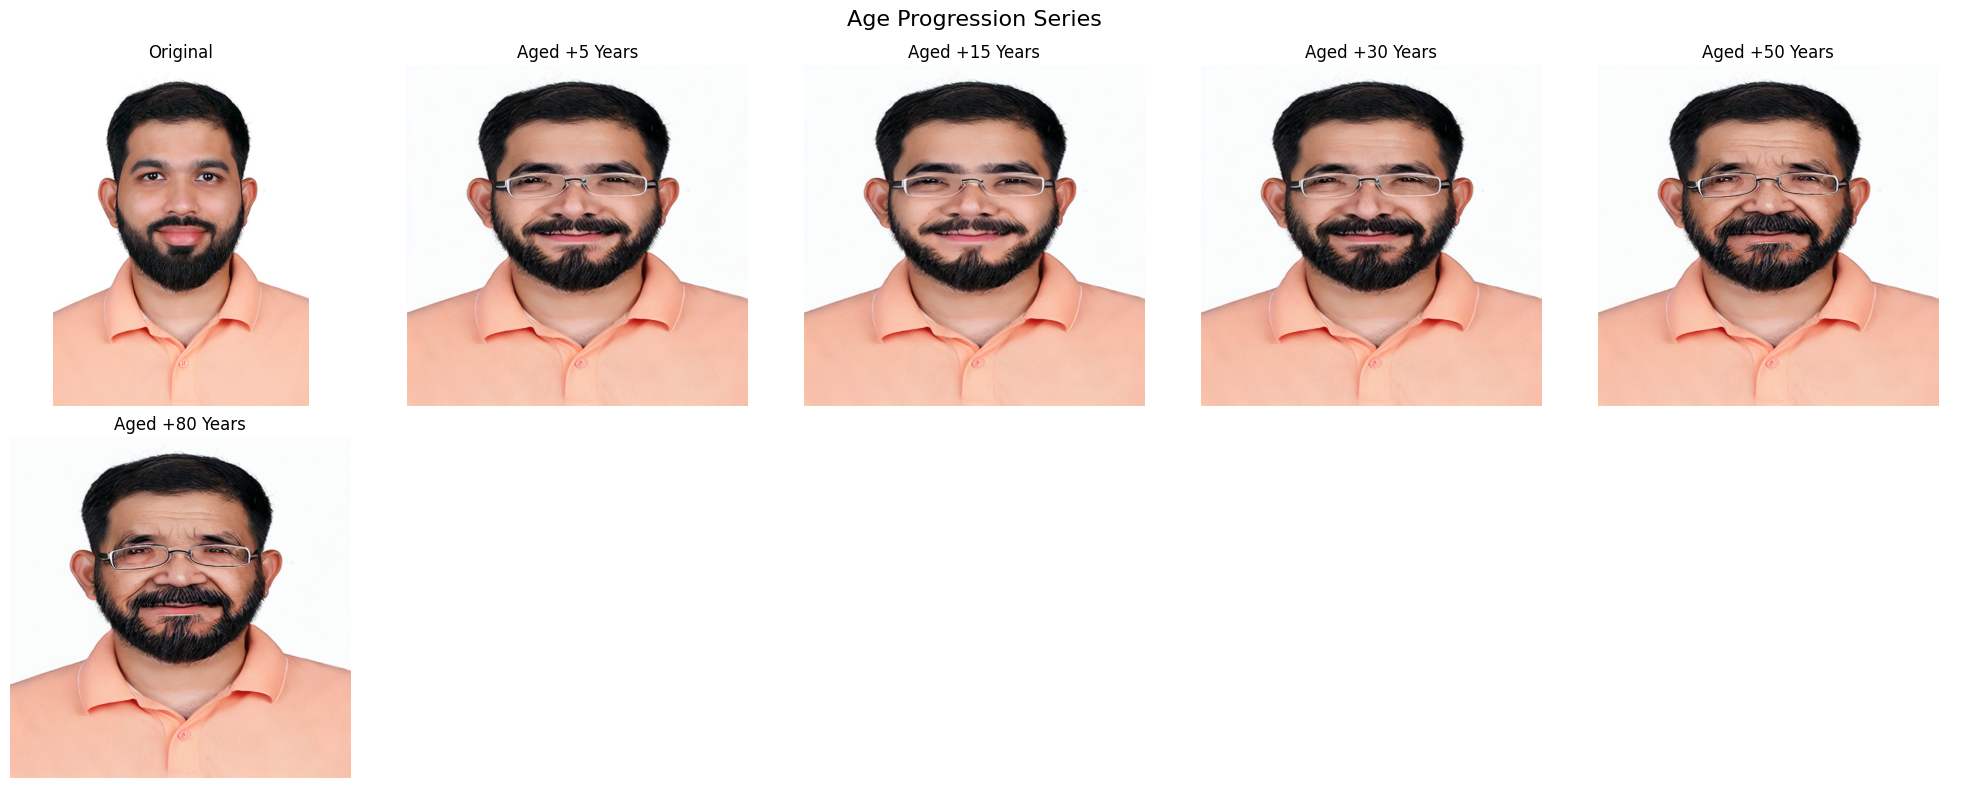

In [8]:
pipeline.visualize_results(results, "Age Progression Series")